In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
path1='/content/drive/My Drive/Time_Series_Prediction-master/Test_0qrQsBZ.csv'
test=pd.read_csv(path1)
path2='/content/drive/My Drive/Time_Series_Prediction-master/Train_SU63ISt.csv'
train=pd.read_csv(path2)



In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from pandas import Series
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

In [4]:
train_original = train.copy()
test_original = test.copy()
train_original.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [0]:
train['Datetime'] = pd.to_datetime(train.Datetime, format = '%d-%m-%Y %H:%M')
test['Datetime'] = pd.to_datetime(test.Datetime, format = '%d-%m-%Y %H:%M')
train_original['Datetime'] = pd.to_datetime(train_original.Datetime, format = '%d-%m-%Y %H:%M')
test_original['Datetime'] = pd.to_datetime(test_original.Datetime, format = '%d-%m-%Y %H:%M')

In [0]:
test.Timestamp = pd.to_datetime(test.Datetime, format='%d-%m-%Y %H:%M')
test.index = test.Timestamp


test = test.resample('D').mean()

train.Timestamp = pd.to_datetime(train.Datetime, format='%d-%m-%Y %H:%M')
train.index = train.Timestamp


train = train.resample('D').mean()

In [0]:
Train = train.ix['2012-08-25':'2014-06-24']
valid = train.ix['2014-06-25':'2014-09-25']

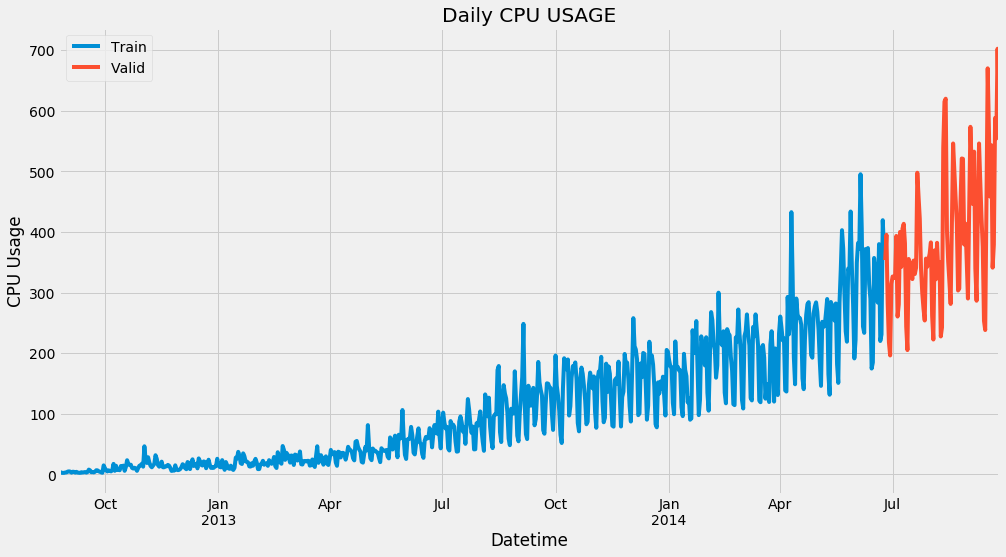

In [8]:
Train.Count.plot(figsize = (15,8), title = 'Daily CPU USAGE', fontsize = 14, label = 'Train')
valid.Count.plot(figsize = (15,8), title = 'Daily CPU USAGE', fontsize =14, label = 'Valid')
plt.xlabel('Datetime')
plt.ylabel('CPU Usage')
plt.legend(loc = 'best')

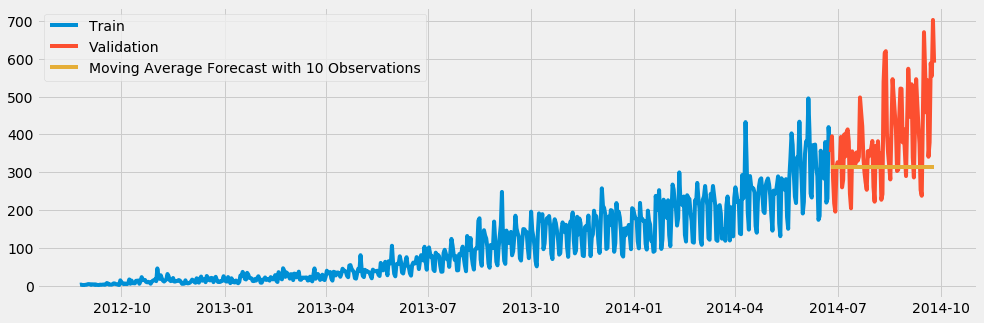

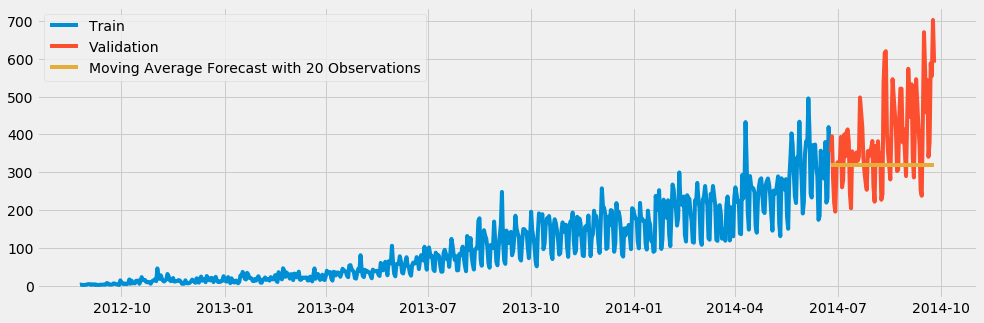

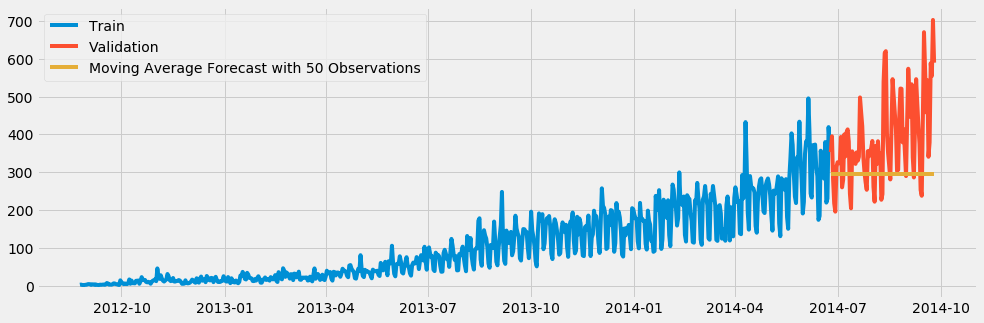

In [9]:
y_hat_avg = valid.copy()
y_hat_avg['moving_average_forecast'] = Train['Count'].rolling(10).mean().iloc[-1]
plt.figure(figsize = (15,5))
plt.plot(Train['Count'], label = 'Train')
plt.plot(valid['Count'], label = 'Validation')
plt.plot(y_hat_avg['moving_average_forecast'], label = 'Moving Average Forecast with 10 Observations')
plt.legend(loc = 'best')
plt.show()
y_hat_avg = valid.copy()
y_hat_avg['moving_average_forecast'] = Train['Count'].rolling(20).mean().iloc[-1]
plt.figure(figsize = (15,5))
plt.plot(Train['Count'], label = 'Train')
plt.plot(valid['Count'], label = 'Validation')
plt.plot(y_hat_avg['moving_average_forecast'],label = 'Moving Average Forecast with 20 Observations')
plt.legend(loc = 'best')
plt.show()
y_hat_avg = valid.copy()
y_hat_avg['moving_average_forecast']= Train['Count'].rolling(50).mean().iloc[-1]
plt.figure(figsize = (15,5))
plt.plot(Train['Count'], label = 'Train')
plt.plot(valid['Count'], label = 'Validation')
plt.plot(y_hat_avg['moving_average_forecast'], label = "Moving Average Forecast with 50 Observations")
plt.legend(loc = 'best')
plt.show()

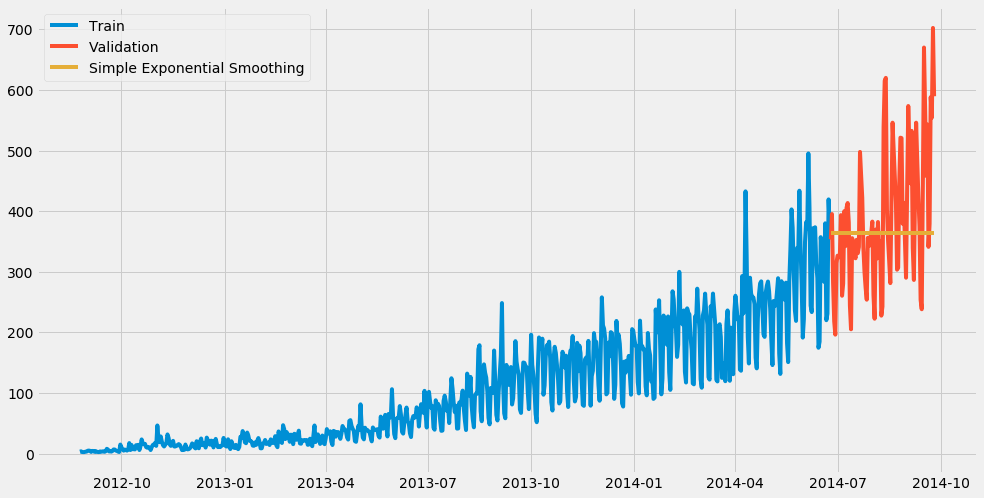

In [10]:
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing, Holt

y_hat = valid.copy()
fit2 = SimpleExpSmoothing(np.asarray(Train['Count'])).fit(smoothing_level = 0.6,optimized = False)
y_hat['SES'] = fit2.forecast(len(valid))
plt.figure(figsize =(15,8))
plt.plot(Train['Count'], label = 'Train')
plt.plot(valid['Count'], label = 'Validation')
plt.plot(y_hat['SES'], label = 'Simple Exponential Smoothing')
plt.legend(loc = 'best')

In [0]:

from sklearn.metrics import mean_squared_error
from math import sqrt

In [12]:
rmse = sqrt(mean_squared_error(valid.Count, y_hat['SES']))
rmse

113.43708111884514

<Figure size 1600x800 with 0 Axes>

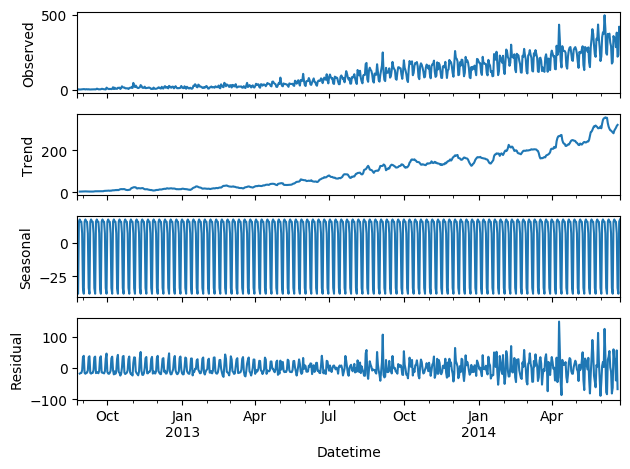

In [13]:
plt.style.use('default')
plt.figure(figsize = (16,8))
import statsmodels.api as sm
sm.tsa.seasonal_decompose(Train.Count).plot()
result = sm.tsa.stattools.adfuller(train.Count)
plt.show()

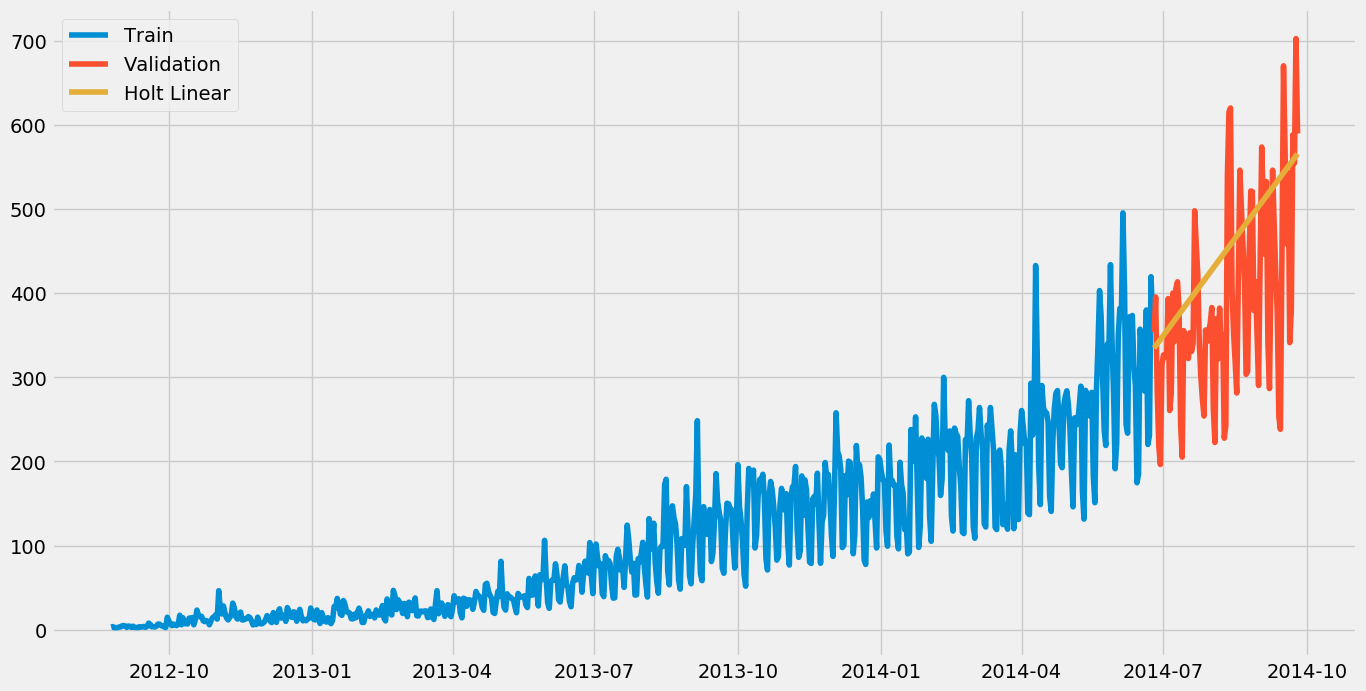

In [14]:
y_hat_holt = valid.copy()
fit1 = Holt(np.asarray(Train['Count'])).fit(smoothing_level = 0.3, smoothing_slope = 0.1)
y_hat_holt['Holt_linear'] = fit1.forecast(len(valid))
plt.style.use('fivethirtyeight')
plt.figure(figsize = (15,8))
plt.plot(Train.Count, label = 'Train')
plt.plot(valid.Count, label = 'Validation')
plt.plot(y_hat_holt['Holt_linear'], label = 'Holt Linear')
plt.legend(loc = 'best')

In [15]:
rmse = sqrt(mean_squared_error(valid.Count, y_hat_holt.Holt_linear))
rmse

112.94278345314041

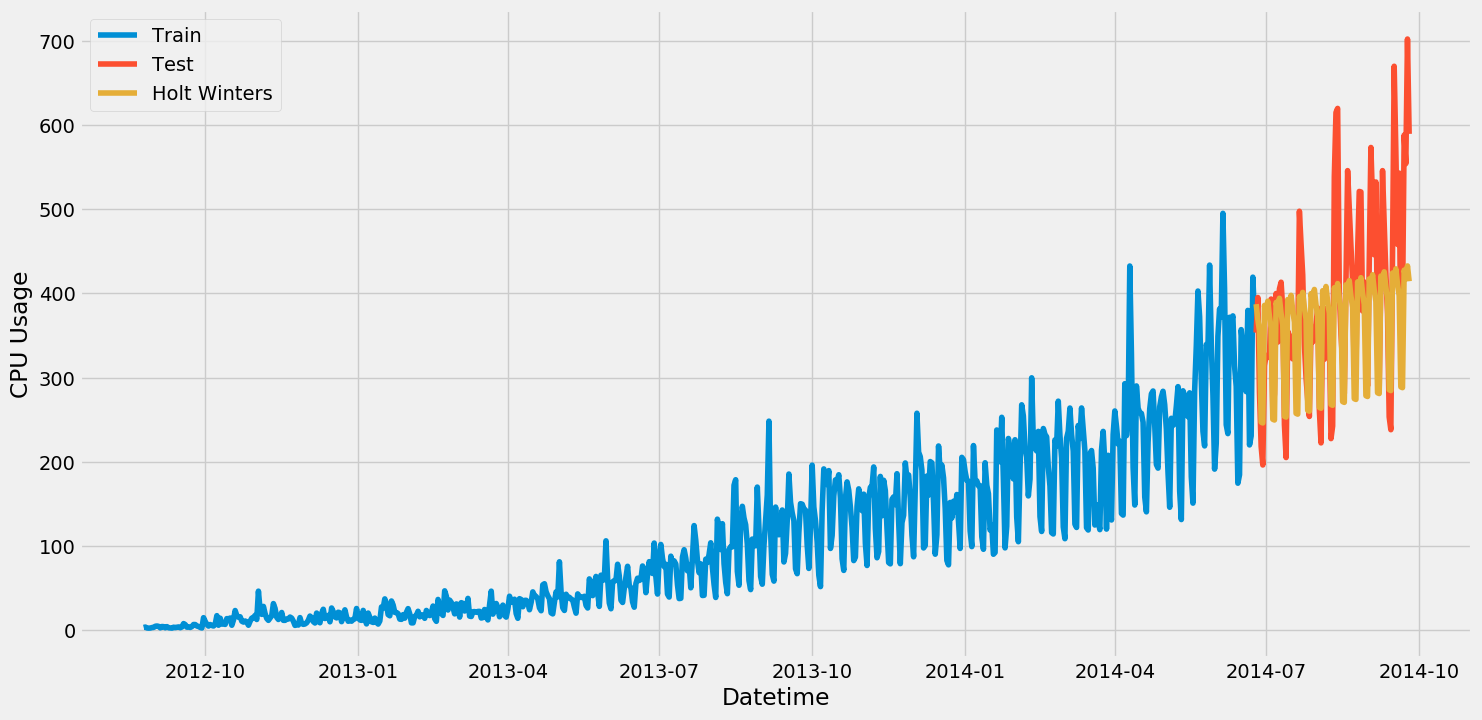

In [16]:
y_hat_avg = valid.copy()
fit1 = ExponentialSmoothing(np.asarray(Train['Count']), seasonal_periods= 7, trend = 'add', seasonal= 'add').fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(valid))
plt.figure(figsize = (16,8))
plt.plot(Train['Count'], label = 'Train')
plt.plot(valid['Count'], label = 'Test')
plt.plot(y_hat_avg.Holt_Winter, label = 'Holt Winters')
plt.xlabel('Datetime')
plt.ylabel('CPU Usage')
plt.legend(loc = 'best')

In [17]:
rmse = sqrt(mean_squared_error(valid['Count'], y_hat_avg['Holt_Winter']))
rmse

82.37571191747172

In [18]:
from sklearn.metrics import mean_absolute_error
error1=mean_absolute_error(valid['Count'],y_hat_avg['Holt_Winter'])
print('Test MAE: %.3f' % error1)

Test MAE: 60.580


In [0]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [20]:
error = mean_absolute_percentage_error(valid['Count'],y_hat_avg['Holt_Winter'])
print('Test MAPE: %.3f' % error)

Test MAPE: 14.298


In [0]:
from statsmodels.tsa.stattools import adfuller
def test_stationary(timeseries):
    #Determine rolling statistics
    
    rolmean=timeseries.rolling(24).mean()
    
    rolstd=timeseries.rolling(24).mean()
    
    #Plot rolling Statistics
    orig = plt.plot(timeseries, color = "blue", label = "Original")
    mean = plt.plot(rolmean, color = "red", label = "Rolling Mean")
    std = plt.plot(rolstd, color = "black", label = "Rolling Std")
    plt.legend(loc = "best")
    plt.title("Rolling Mean and Standard Deviation")
    plt.show(block = False)
    
    #Perform Dickey Fuller test
    print("Results of Dickey Fuller test: ")
    dftest = adfuller(timeseries, autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistics', 'p-value', '# Lag Used', 'Number of Observations Used'])
    
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' %key] = value
    print(dfoutput)

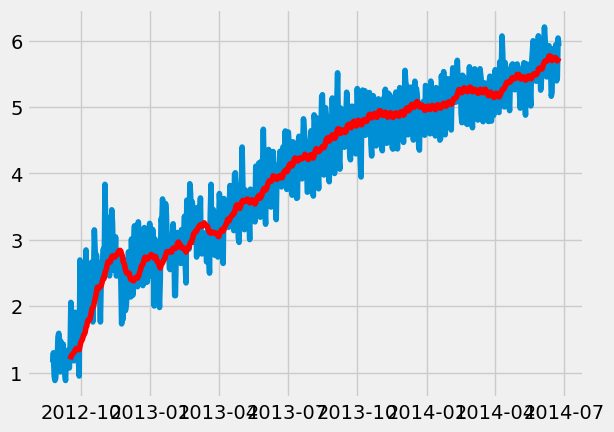

In [22]:
Train_log = np.log(Train['Count'])
valid_log = np.log(valid['Count'])

moving_avg = Train_log.rolling(24).mean()
plt.plot(Train_log)
plt.plot(moving_avg, color = 'red')

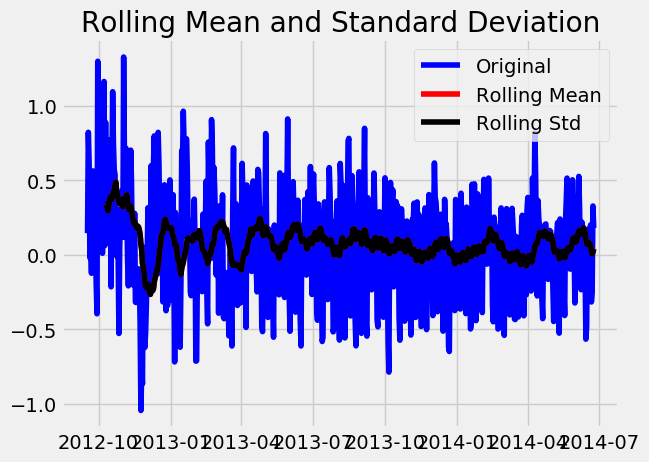

Results of Dickey Fuller test: 
Test Statistics               -5.861646e+00
p-value                        3.399422e-07
# Lag Used                     2.000000e+01
Number of Observations Used    6.250000e+02
Critical Value (1%)           -3.440856e+00
Critical Value (5%)           -2.866175e+00
Critical Value (10%)          -2.569239e+00
dtype: float64


In [23]:
train_log_moving_diff = Train_log - moving_avg
train_log_moving_diff.dropna(inplace = True)
test_stationary(train_log_moving_diff)

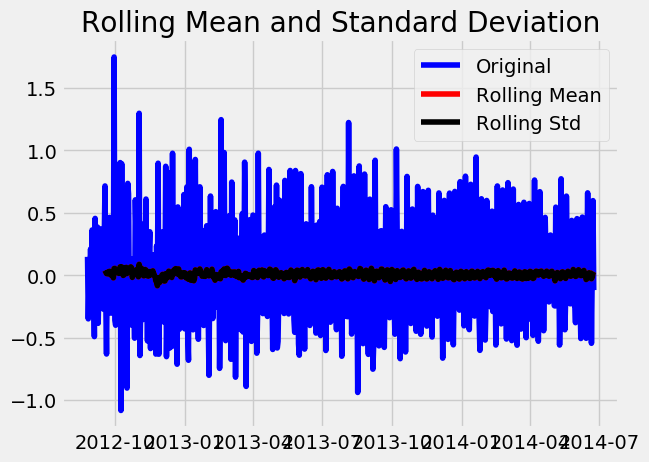

Results of Dickey Fuller test: 
Test Statistics               -8.237568e+00
p-value                        5.834049e-13
# Lag Used                     1.900000e+01
Number of Observations Used    6.480000e+02
Critical Value (1%)           -3.440482e+00
Critical Value (5%)           -2.866011e+00
Critical Value (10%)          -2.569151e+00
dtype: float64


In [24]:
train_log_diff = Train_log - Train_log.shift(1)
test_stationary(train_log_diff.dropna())

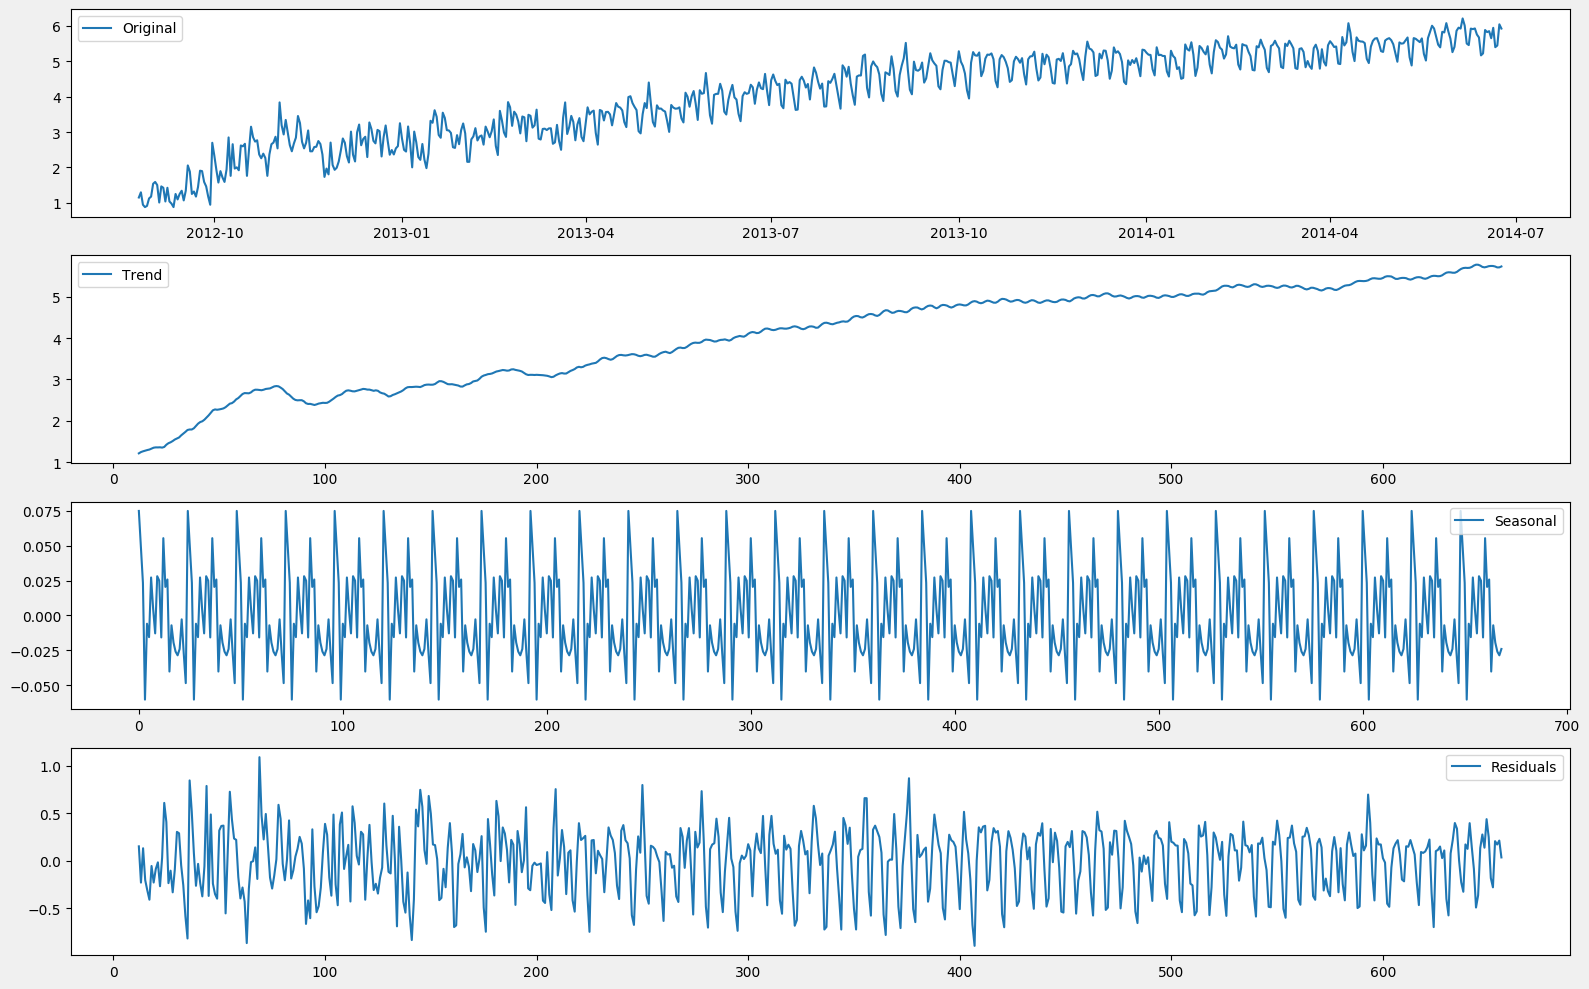

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.figure(figsize = (16,10))
decomposition = seasonal_decompose(pd.DataFrame(Train_log).Count.values, freq = 24)
plt.style.use('default')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(Train_log, label = 'Original')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label = 'Residuals')
plt.legend(loc = 'best')
plt.tight_layout()

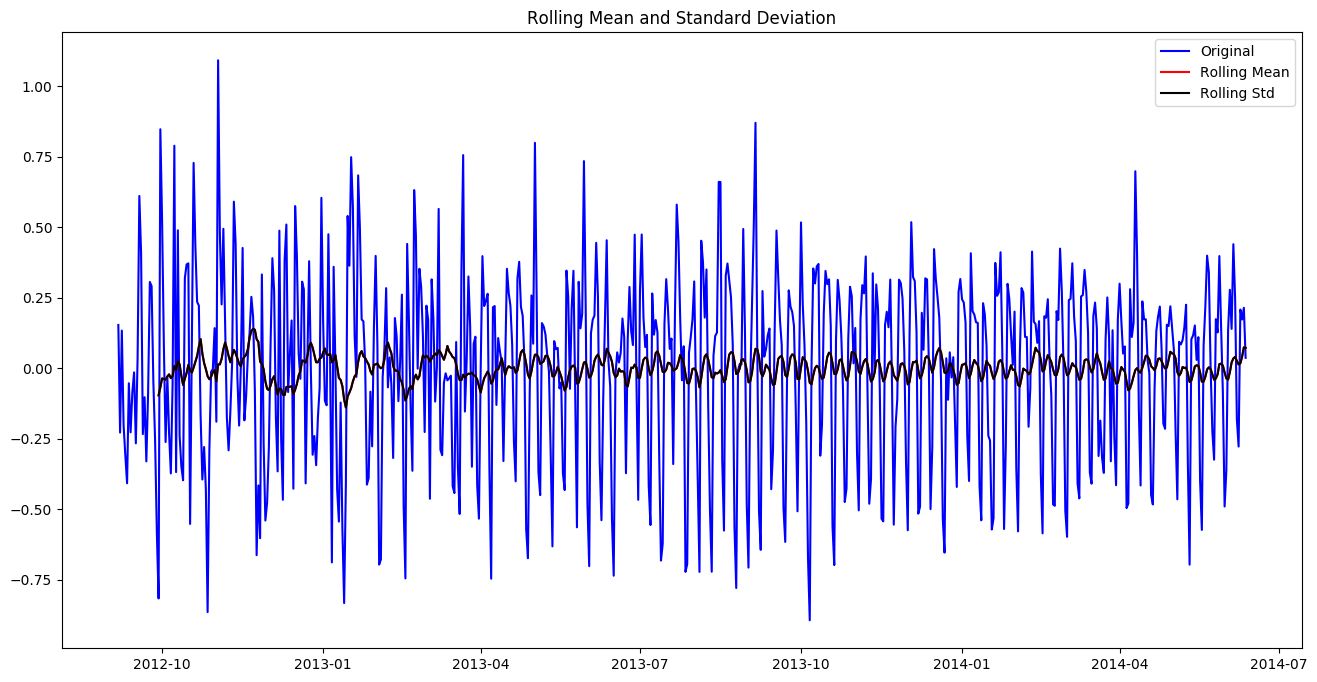

Results of Dickey Fuller test: 
Test Statistics               -7.822096e+00
p-value                        6.628321e-12
# Lag Used                     2.000000e+01
Number of Observations Used    6.240000e+02
Critical Value (1%)           -3.440873e+00
Critical Value (5%)           -2.866183e+00
Critical Value (10%)          -2.569243e+00
dtype: float64


In [26]:
plt.figure(figsize = (16,8))
train_log_decompose = pd.DataFrame(residual)
train_log_decompose['date'] = Train_log.index
train_log_decompose.set_index('date', inplace = True)
train_log_decompose.dropna(inplace = True)
test_stationary(train_log_decompose[0])

In [0]:

from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(train_log_diff.dropna(), nlags = 50)
lag_pacf = pacf(train_log_diff.dropna(), nlags = 50, method= "ols")


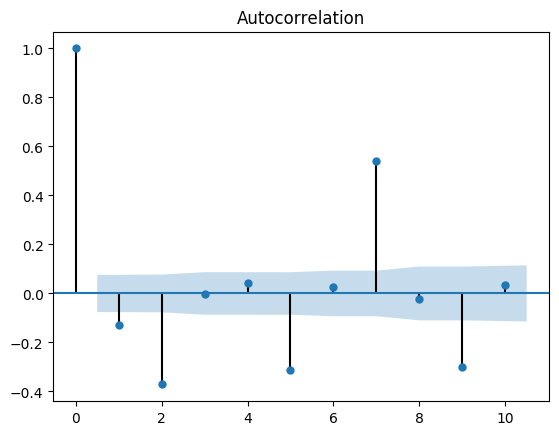

In [28]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(train_log_diff.dropna(),lags=10)
pyplot.show()

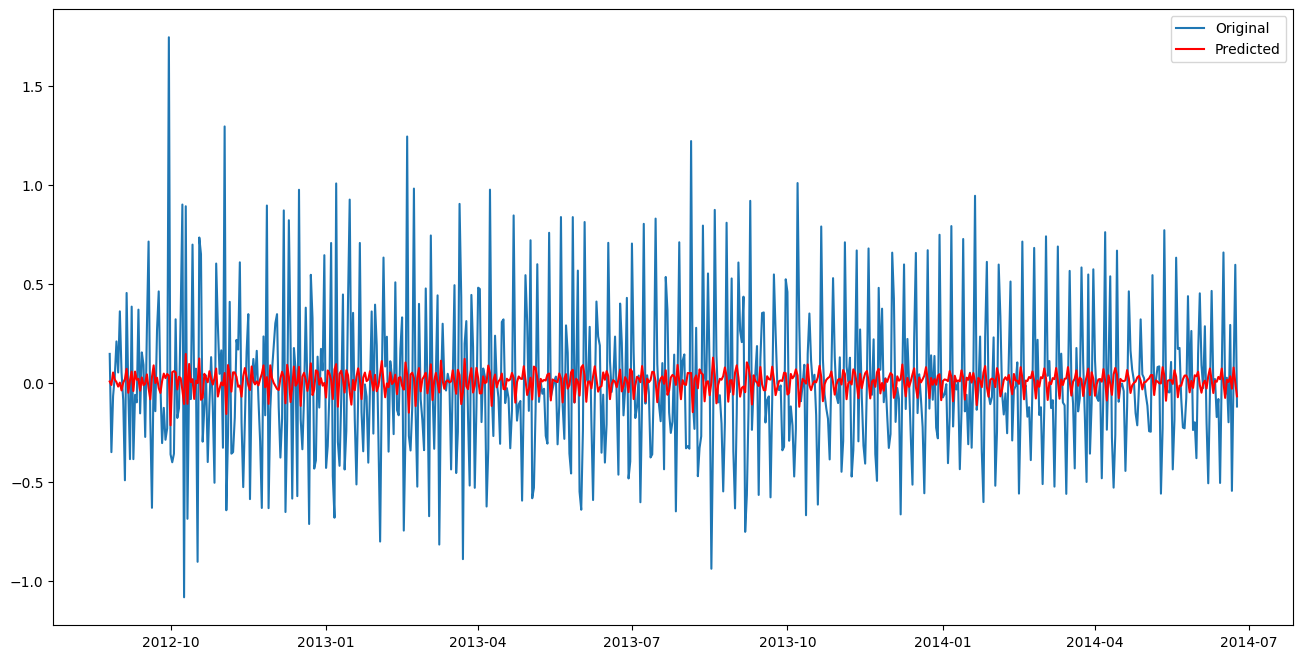

In [29]:
from statsmodels.tsa.arima_model import ARIMA
plt.figure(figsize = (16,8))
model = ARIMA(Train_log, order=(1,1,0))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(train_log_diff.dropna(),  label='Original')
plt.plot(results_ARIMA.fittedvalues, color='red', label='Predicted')
plt.legend(loc='best')
plt.show()

In [0]:
def check_prediction_diff(predict_diff, given_set):
    predict_diff= predict_diff.cumsum().shift().fillna(0)
    predict_base = pd.Series(np.ones(given_set.shape[0]) * np.log(given_set['Count'])[0], index = given_set.index)
    predict_log = predict_base.add(predict_diff,fill_value=0)
    predict = np.exp(predict_log)
    
    plt.plot(given_set['Count'], label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set['Count']))/given_set.shape[0]))
    plt.show()

In [0]:
import matplotlib.dates as mdates

def arima_model(series, data_split, params, future_periods, log):
    
    # log transformation of data if user selects log as true
    if log == True:
        series_dates = series.index
        series = pd.Series(np.log(series), index=series.index)
       
    # create training and testing data sets based on user split fraction
    size = int(len(series) * data_split)
    train, test = series[0:size], series[size:len(series)]
    history = [val for val in train]
    predictions = []

    # creates a rolling forecast by testing one value from the test set, and then add that test value
    # to the model training, followed by testing the next test value in the series
    for t in range(len(test)):
        model = ARIMA(history, order=(params[0], params[1], params[2]))
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat[0])
        obs = test[t]
        history.append(obs)
    
    # forecasts future periods past the input testing series based on user input
    future_forecast = model_fit.forecast(future_periods)[0]
    future_dates = [test.index[-1]+timedelta(i*365/12) for i in range(1, future_periods+1)]
    test_dates = test.index
    
    # if the data was originally log transformed, the inverse transformation is performed
    if log == True:
        predictions = np.exp(predictions)
        test = pd.Series(np.exp(test), index=test_dates)
        future_forecast = np.exp(future_forecast)
    
    # creates pandas series with datetime index for the predictions and forecast values
    forecast = pd.Series(future_forecast, index=future_dates)
    predictions = pd.Series(predictions, index=test_dates)
    

    plt.figure(figsize=(16,8))
    plt.plot(test, label = "Test")
    plt.plot(predictions, label ="ARIMA")
    plt.xlabel('Datetime')
    plt.ylabel('CPU Usage')
    plt.legend(loc = "best")
    plt.title("ARIMA Model")
    
    # calculates root mean squared errors (RMSEs) for the out-of-sample predictions
    error = np.sqrt(mean_squared_error(predictions, test))
    print('Test RMSE: %.3f' % error)

    error1=mean_absolute_error(predictions,test)
    print('Test MAE: %.3f' % error)


    return predictions, test, future_forecast

In [0]:
def create_dataset(data_series, look_back, split_frac, transforms):
    
    # log transforming that data, if necessary
    if transforms[0] == True:
        dates = data_series.index
        data_series = pd.Series(np.log(data_series), index=dates)
    
    # differencing data, if necessary
    if transforms[1] == True:
        dates = data_series.index
        data_series = pd.Series(data_series - data_series.shift(1), index=dates).dropna()

    # scaling values between 0 and 1
    dates = data_series.index
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data_series.values.reshape(-1, 1))
    data_series = pd.Series(scaled_data[:, 0], index=dates)
    
    # creating targets and features by shifting values by 'i' number of time periods
    df = pd.DataFrame()
    for i in range(look_back+1):
        label = ''.join(['t-', str(i)])
        df[label] = data_series.shift(i)
    df = df.dropna()
    print(df.tail())
    
    # splitting data into train and test sets
    size = int(split_frac*df.shape[0])
    train = df[:size]
    test = df[size:]
    
    # creating target and features for training set
    X_train = train.iloc[:, 1:].values
    y_train = train.iloc[:, 0].values
    train_dates = train.index
    
    # creating target and features for test set
    X_test = test.iloc[:, 1:].values
    y_test = test.iloc[:, 0].values
    test_dates = test.index
    
    # reshaping data into 3 dimensions for modeling with the LSTM neural net
    X_train = np.reshape(X_train, (X_train.shape[0], 1, look_back))
    X_test = np.reshape(X_test, (X_test.shape[0], 1, look_back))
    
    return X_train, y_train, X_test, y_test, train_dates, test_dates, scaler

In [0]:
def inverse_transforms(train_predict, y_train, test_predict, y_test, data_series, train_dates, test_dates, scaler):
    
    # inverse 0 to 1 scaling
    train_predict = pd.Series(scaler.inverse_transform(train_predict.reshape(-1,1))[:,0], index=train_dates)
    y_train = pd.Series(scaler.inverse_transform(y_train.reshape(-1, 1))[:,0], index=train_dates)

    test_predict = pd.Series(scaler.inverse_transform(test_predict.reshape(-1, 1))[:,0], index=test_dates)
    y_test = pd.Series(scaler.inverse_transform(y_test.reshape(-1, 1))[:,0], index=test_dates)
    
    # reversing differencing if log transformed as well
    if (transforms[1] == True) & (transforms[0] == True):
        train_predict = pd.Series(train_predict + np.log(data_series.shift(1)), index=train_dates).dropna()
        y_train = pd.Series(y_train + np.log(data_series.shift(1)), index=train_dates).dropna()

        test_predict = pd.Series(test_predict + np.log(data_series.shift(1)), index=test_dates).dropna()
        y_test = pd.Series(y_test + np.log(data_series.shift(1)), index=test_dates).dropna()
    
    # reversing differencing if no log transform
    elif transforms[1] == True:
        train_predict = pd.Series(train_predict + data_series.shift(1), index=train_dates).dropna()
        y_train = pd.Series(y_train + data_series.shift(1), index=train_dates).dropna()

        test_predict = pd.Series(test_predict + data_series.shift(1), index=test_dates).dropna()
        y_test = pd.Series(y_test + data_series.shift(1), index=test_dates).dropna()
      
    # reversing log transformation
    if transforms[0] == True:
        train_predict = pd.Series(np.exp(train_predict), index=train_dates)
        y_train = pd.Series(np.exp(y_train), index=train_dates)

        test_predict = pd.Series(np.exp(test_predict), index=test_dates)
        y_test = pd.Series(np.exp(y_test), index=test_dates)
        
    return train_predict, y_train, test_predict, y_test

In [0]:
def lstm_model(data_series, look_back, split, transforms, lstm_params):
    np.random.seed(1)
    
    # creating the training and testing datasets
    X_train, y_train, X_test, y_test, train_dates, test_dates, scaler = create_dataset(data_series, look_back, split, transforms)

    # training the model
    model = Sequential()
    model.add(LSTM(lstm_params[0], input_shape=(1, look_back)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X_train, y_train, epochs=lstm_params[1], batch_size=1, verbose=lstm_params[2])
    
    # making predictions
    train_predict = model.predict(X_train)
    test_predict = model.predict(X_test)
    
    # inverse transforming results
    train_predict, y_train, test_predict, y_test = \
    inverse_transforms(train_predict, y_train, test_predict, y_test, data_series, train_dates, test_dates, scaler)
    
   
    error = np.sqrt(mean_squared_error(test_predict, y_test))
    print('Test RMSE: %.3f' % error)

    error1=mean_absolute_error(test_predict,y_test)
    print('Test MAE: %.3f' % error1)
     
     
    # plot of predictions and actual values
    plt.figure(figsize=(16,8))
    plt.plot(y_test, label = "Test")
    plt.plot(test_predict+60, label = "LSTM")
    plt.xlabel('Datetime')
    plt.ylabel('CPU Usage')
    plt.legend(loc = "best")
    plt.title("LSTM")
    plt.show()
    


    return train_predict, y_train, test_predict, y_test

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import timedelta
from statsmodels.tsa.arima_model import ARIMA
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from scipy.ndimage.filters import gaussian_filter
from sklearn.metrics import mean_absolute_error

Using TensorFlow backend.


In [0]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Test RMSE: 77.760
Test MAE: 77.760
Test MAPE: 25.815


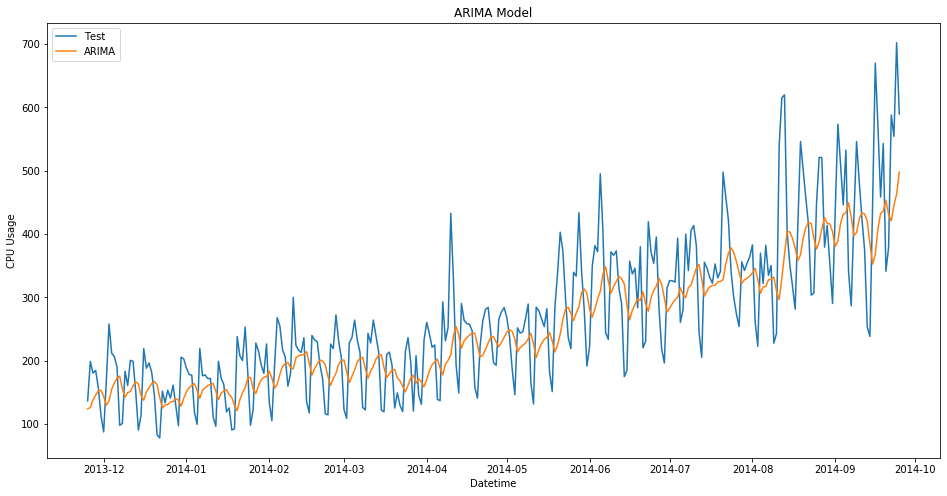

In [37]:
data_split = 0.60
p = 1
d = 0
q = 1
params = [p, d, q]
future_periods = 10
log = True

predictions, test, forecast = arima_model(train['Count'], data_split, params, future_periods, log)
error = mean_absolute_percentage_error(predictions,test)
print('Test MAPE: %.3f' % error)


                 t-0       t-1       t-2  ...      t-10      t-11      t-12
Datetime                                  ...                              
2014-09-21  0.420298  0.218603  0.442755  ...  0.336980  0.339553  0.470478
2014-09-22  0.537792  0.420298  0.218603  ...  0.339734  0.336980  0.339553
2014-09-23  0.361925  0.537792  0.420298  ...  0.243958  0.339734  0.336980
2014-09-24  0.466404  0.361925  0.537792  ...  0.361046  0.243958  0.339734
2014-09-25  0.321104  0.466404  0.361925  ...  0.603836  0.361046  0.243958

[5 rows x 13 columns]




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where








Test RMSE: 77.146
Test MAE: 57.591


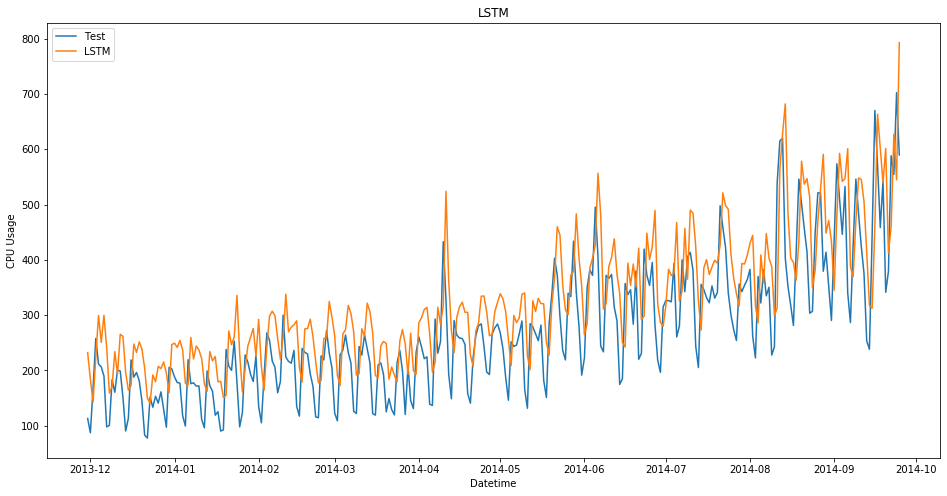

Test MAPE: 22.764


In [38]:
look_back = 12
split = 0.6
log = True
difference = True
transforms = [log, difference]

nodes = 3
epochs = 1
verbose = 0 # 0=print no output, 1=most, 2=less, 3=least
lstm_params = [nodes, epochs, verbose]

train_predict, y_train, test_predict, y_test = lstm_model(train['Count'], look_back, split, transforms, lstm_params)
error = mean_absolute_percentage_error(y_test,test_predict)
print('Test MAPE: %.3f' % error)


Hybrid model

In [0]:
def arima_model11(series, data_split, params, future_periods, log):
    
    # log transformation of data if user selects log as true
    if log == True:
        series_dates = series.index
        series = pd.Series(np.log(series), index=series.index)
       
    # create training and testing data sets based on user split fraction
    size = int(len(series) * data_split)
    train, test = series[0:size], series[size:len(series)]
    history = [val for val in train]
    predictions = []

    # creates a rolling forecast by testing one value from the test set, and then add that test value
    # to the model training, followed by testing the next test value in the series
    for t in range(len(test)):
        model = ARIMA(history, order=(params[0], params[1], params[2]))
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat[0])
        obs = test[t]
        history.append(obs)
    
    # forecasts future periods past the input testing series based on user input
    future_forecast = model_fit.forecast(future_periods)[0]
    future_dates = [test.index[-1]+timedelta(i*365/12) for i in range(1, future_periods+1)]
    test_dates = test.index
    
    # if the data was originally log transformed, the inverse transformation is performed
    if log == True:
        predictions = np.exp(predictions)
        test = pd.Series(np.exp(test), index=test_dates)
        future_forecast = np.exp(future_forecast)
    
    # creates pandas series with datetime index for the predictions and forecast values
    forecast = pd.Series(future_forecast, index=future_dates)
    predictions = pd.Series(predictions, index=test_dates)
    
    
    return predictions, test, future_forecast

In [40]:
data_split = 0.10
p = 1
d = 0
q = 1
params = [p, d, q]
future_periods = 10
log = True

predictions, test, forecast = arima_model11(train['Count'], data_split, params, future_periods, log)

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [0]:
prediction_from_arima=predictions
dataset_after_arima=test

In [0]:
residual_from_arima=dataset_after_arima-prediction_from_arima

In [43]:
dataset_after_arima.head()

Datetime
2012-11-09    14.500000
2012-11-10    17.166667
2012-11-11    31.583333
2012-11-12    25.833333
2012-11-13    15.250000
Freq: D, Name: Count, dtype: float64

In [44]:
prediction_from_arima.head()

Datetime
2012-11-09    14.730883
2012-11-10    14.356252
2012-11-11    15.142222
2012-11-12    19.239130
2012-11-13    21.052263
Freq: D, dtype: float64

In [45]:
residual_from_arima.head()

Datetime
2012-11-09    -0.230883
2012-11-10     2.810415
2012-11-11    16.441111
2012-11-12     6.594203
2012-11-13    -5.802263
Freq: D, dtype: float64

In [0]:
def lstm_model11(data_series, look_back, split, transforms, lstm_params):
    np.random.seed(1)
    
    # creating the training and testing datasets
    X_train, y_train, X_test, y_test, train_dates, test_dates, scaler = create_dataset(data_series, look_back, split, transforms)

    # training the model
    model = Sequential()
    model.add(LSTM(lstm_params[0], input_shape=(1, look_back)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X_train, y_train, epochs=lstm_params[1], batch_size=1, verbose=lstm_params[2])
    
    # making predictions
    train_predict = model.predict(X_train)
    test_predict = model.predict(X_test)
    
    # inverse transforming results
    train_predict, y_train, test_predict, y_test = \
    inverse_transforms(train_predict, y_train, test_predict, y_test, data_series, train_dates, test_dates, scaler)
    
    # plot of predictions and actual values
    plt.figure(figsize=(16,8))
    plt.plot(y_test, label = "Test")
    plt.plot(test_predict-20, label = "Prediction")
    plt.xlabel('Datetime')
    plt.ylabel('CPU Usage')
    plt.legend(loc = "best")
    plt.title("LSTM")
    plt.show()
    
    # calculating RMSE metrics
    #error = np.sqrt(mean_squared_error(train_predict, y_train))
    #print('Train RMSE: %.3f' % error)
    error = np.sqrt(mean_squared_error(test_predict, y_test))
    print('Test RMSE: %.3f' % error)

    error1=mean_absolute_error(test_predict,y_test)
    print('Test MAE: %.3f' % error1)
    
    return train_predict, y_train, test_predict, y_test

                 t-0       t-1       t-2  ...       t-8       t-9      t-10
Datetime                                  ...                              
2014-09-18  0.372286  0.526921  0.760070  ...  0.761807  0.585442  0.686668
2014-09-19  0.789349  0.372286  0.526921  ...  0.518755  0.761807  0.585442
2014-09-23  0.551778  0.789349  0.372286  ...  0.371047  0.518755  0.761807
2014-09-24  0.709757  0.551778  0.789349  ...  0.853156  0.371047  0.518755
2014-09-25  0.484002  0.709757  0.551778  ...  0.817014  0.853156  0.371047

[5 rows x 11 columns]


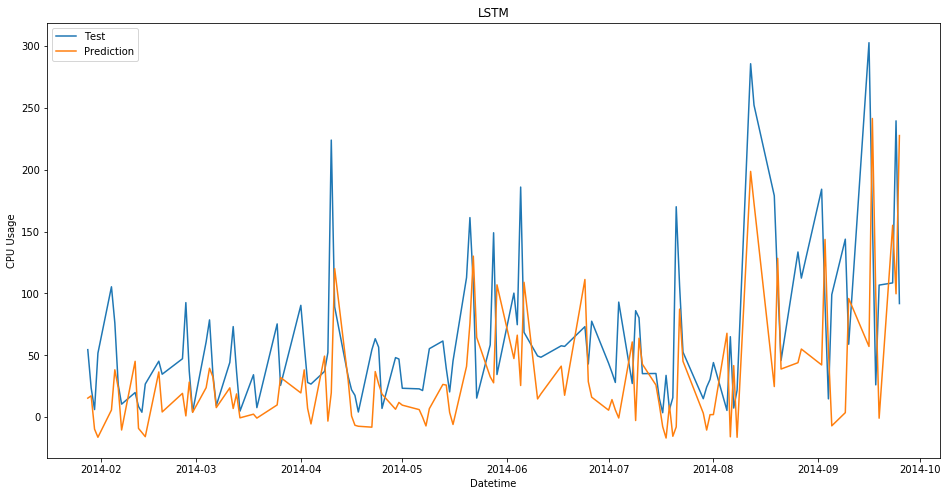

Test RMSE: 57.389
Test MAE: 39.058


In [47]:
look_back = 10
split = 0.60
log = True
difference = True
transforms = [log, difference]

nodes = 4
epochs = 8
verbose = 0 # 0=print no output, 1=most, 2=less, 3=least
lstm_params = [nodes, epochs, verbose]

train_predict, y_train, test_predict, y_test = lstm_model11(residual_from_arima, look_back, split, transforms, lstm_params)

In [48]:
LSTM_predictions=test_predict
LSTM_predictions.head()

Datetime
2014-01-28    35.327818
2014-01-29    37.201990
2014-01-30    10.288662
2014-01-31     3.713861
2014-02-04    25.749576
dtype: float64

In [0]:
size = int(0.6*dataset_after_arima.shape[0])
prediction_from_arima=prediction_from_arima[size:]
test1=test[size:]

In [50]:
prediction_from_arima1=prediction_from_arima[34:]
prediction_from_arima1.head()

Datetime
2014-01-28    160.556004
2014-01-29    169.590066
2014-01-30    173.655157
2014-01-31    174.556753
2014-02-01    183.295674
Freq: D, dtype: float64

In [0]:
prediction_from_arima2=LSTM_predictions+prediction_from_arima1

In [52]:
prediction_from_arima2

Datetime
2014-01-28    195.883823
2014-01-29    206.792056
2014-01-30    183.943818
2014-01-31    178.270614
2014-02-01           NaN
                 ...    
2014-09-21           NaN
2014-09-22           NaN
2014-09-23    620.893154
2014-09-24    582.535231
2014-09-25    745.474420
Length: 241, dtype: float64

In [0]:
prediction_from_arima3=prediction_from_arima2.fillna(0)

In [54]:
prediction_from_arima3.head()

Datetime
2014-01-28    195.883823
2014-01-29    206.792056
2014-01-30    183.943818
2014-01-31    178.270614
2014-02-01      0.000000
dtype: float64

In [55]:
prediction_from_arima4=prediction_from_arima3-prediction_from_arima1
prediction_from_arima4.head()

Datetime
2014-01-28     35.327818
2014-01-29     37.201990
2014-01-30     10.288662
2014-01-31      3.713861
2014-02-01   -183.295674
dtype: float64

In [56]:
prediction_from_arima4[prediction_from_arima4 < 0] = 0
prediction_from_arima4.head(10)

Datetime
2014-01-28    35.327818
2014-01-29    37.201990
2014-01-30    10.288662
2014-01-31     3.713861
2014-02-01     0.000000
2014-02-02     0.000000
2014-02-03     0.000000
2014-02-04    25.749576
2014-02-05    58.239369
2014-02-06    43.766738
dtype: float64

In [57]:
Final_predictions=prediction_from_arima4+prediction_from_arima1
Final_predictions.head()

Datetime
2014-01-28    195.883823
2014-01-29    206.792056
2014-01-30    183.943818
2014-01-31    178.270614
2014-02-01    183.295674
dtype: float64

In [58]:
test2=test1[34:]
test2.head()

Datetime
2014-01-28    215.083333
2014-01-29    193.166667
2014-01-30    179.750000
2014-01-31    226.250000
2014-02-01    134.500000
Freq: D, Name: Count, dtype: float64

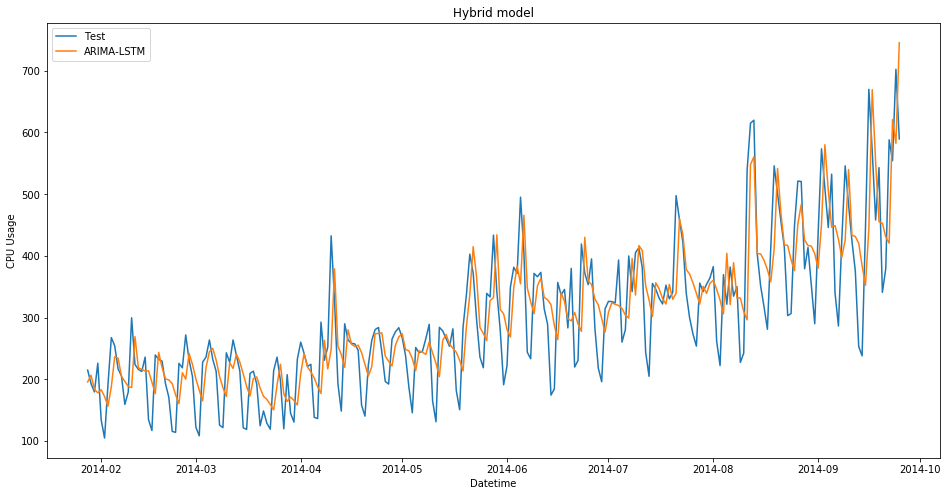

In [59]:
plt.figure(figsize=(16,8))
plt.plot(test2, label = "Test")
plt.plot(Final_predictions, label = "ARIMA-LSTM")
plt.xlabel('Datetime')
plt.ylabel('CPU Usage')
plt.legend(loc = "best")
plt.title("Hybrid model")
plt.show()

In [60]:
error = np.sqrt(mean_squared_error(test2,Final_predictions ))
print('Test RMSE: %.3f' % error)

error1=mean_absolute_error(test2,Final_predictions)
print('Test MAE: %.3f' % error1)

error = mean_absolute_percentage_error(test2,Final_predictions)
print('Test MAPE: %.3f' % error)


Test RMSE: 69.263
Test MAE: 54.506
Test MAPE: 21.102
